# MA124 Maths by Computer: Assignment 2



Student number: u2100098
---


This assignment is based upon modelling the spread of a disease using an SIR model, and how vaccination and mask mandate laws can reduce the spread of the disease i.e. "flatten the curve".

The SIR model is the system of ODEs:
$$
\dot S  = - \frac{\beta S I}{N}, \quad 
\dot I  = \frac{\beta S I}{N} - \gamma I, \quad 
\dot R  = \gamma I,
$$
where $S$ is the number of susceptible individuals, $I$ is the number of infectious individuals, $R$ is the number of recovered or removed individuals. $N$ is the total number of individuals, i.e. $N = S+I+R$. $\beta$ and $\gamma$ are parameters: $\beta$ is the average number of contacts per person per time, $\gamma$ is the reciprocal of the time an individual remains infectious. 

The basic reproduction ratio is given by $\displaystyle{R_0 = \frac{\beta}{\gamma}}$.

In [1]:
#import standard libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

---

## A. Baseline Case

This models the spread of the disease when there is no immunity due to vaccination or previous infection, or mask mandate social distancing mechanisms.
The initial values of S, I and R are 10^6, 5, and 0 respectively, and  $\beta=0.3$ and $\gamma=0.1$.

In [2]:
# --- First define the RHS of ODE system --- #

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 0.3
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [3]:
# --- Problem setup --- #

# set up time grid for solution
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)

# Set initial conditions and put into array y0
S0 = 10.0**6 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

In [4]:
# --- Call the ODE solver and extract solutions --- #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

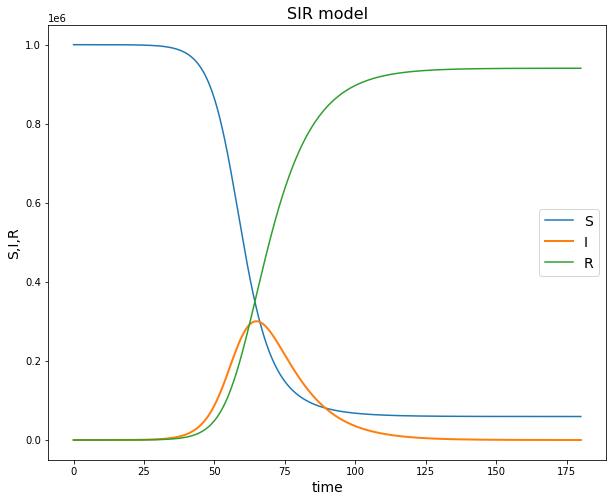

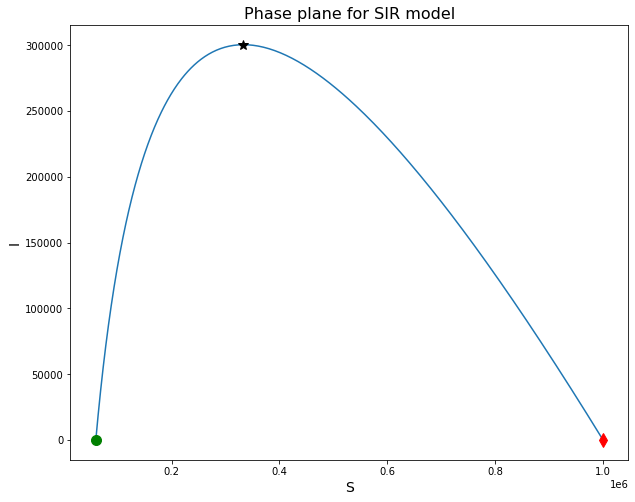

The maximum value of I is 300463.6740973029  occuring at S = [332721.02710906] marked at the black star.
At the end of the simulation, the final value of S, I, and R are (rounded):
S(t=tf) = 59531
I(t=tf) = 51
R(t=tf) = 940418


In [5]:
# --- Plotting the graphs --- #

# plot the time evolution of the S, I, R
plt.figure(figsize=(10, 8))
plt.plot(t, S, label="S")
plt.plot(t, I, lw = 2, label="I")
plt.plot(t, R, label="R")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.figure(figsize=(10, 8))
plt.plot(S, I)

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# put some markers to show initial and final states and the max value of I
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.plot(S[np.where(I==np.amax(I))],np.amax(I), 'k*', markersize = 10)
plt.show()

# --- Report the final values of S, I, R.  --- #

print('The maximum value of I is',np.amax(I)," occuring at S =",S[np.where(I==np.amax(I))],'marked at the black star.' )
print("At the end of the simulation, the final value of S, I, and R are (rounded):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]))

#### Description of graphs above:

The time series graph shows how the values of S, I and R (the number of susceptible, infected and recovered individuals) vary over time.
The number of infected people intially increases slowly. At t = 30 the number of infected people rises rapidly and reaches a peak, but then decreases since the number of recovered people increases, so the number of susceptible people decreases. Hence the number of infected people decreases back to (near) 0 again, with the number of recovered people being close to 10^6 (the initial population).

The phase plane shows how the number of infected people varies as the number of susceptible people varies. Note that the initial rate of increase of I is very high, but the rate of increase decreases, since the number of susceptible people decreases, meaning that disease can spread to less people. At the star the gradient of the curve is 0, and then the number of infected people at a given time begins to reduce again.

---

## B. Prior Immunity

This models the spread of the disease when 20% of the initial population is completely immune to the disease, perhaps due to vaccination or natural immunity due to previous infection.

In [6]:
# Change initial conditions S(0) and R(0) so that 20% of the intitial population is immune
S0_immunity = 10.0**6 - 2*10**5 - 5
R0_immunity = 2*10**5
I0_immunity = 5
y0_immunity = np.array([S0_immunity, I0_immunity, R0_immunity])

In [7]:
# --- Call the ODE solver and extract solutions for the immunity case --- #
  
y_immunity_sol = odeint(SIR, y0_immunity, t)

# extract S, I, R from the solution array y_immunity
S_immunity = y_immunity_sol[:,0]
I_immunity = y_immunity_sol[:,1]
R_immunity = y_immunity_sol[:,2]

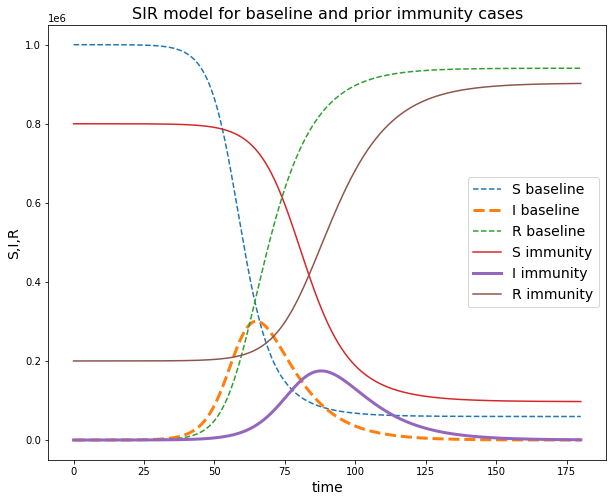

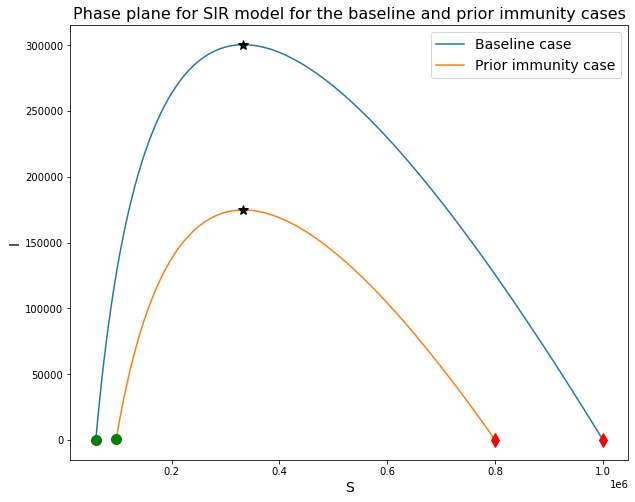

In the baseline case, the maximum value of I is 300463.6740973029  occuring at S = [332721.02710906] marked at the black star on the blue curve.
At the end of the simulation, the final value of S, I, and R are (rounded):
S(t=tf) = 59531
I(t=tf) = 51
R(t=tf) = 940418

In the prior immunity case, the maximum value of I is 174845.5900502789  occuring at S = [332927.12990883] marked at the black star on the orange curve.
At the end of the simulation, the final value of S, I, and R are (rounded):
S(t=tf) = 97384
I(t=tf) = 635
R(t=tf) = 901982


In [8]:
# --- Plotting the graphs in the baseline and immunity cases --- #

plt.figure(figsize=(10, 8))

# plot the time evolution of the S, I, R, and the same for the immunity case
plt.plot(t, S, label="S baseline",linestyle='--')
plt.plot(t, I, lw = 3, label="I baseline",linestyle='--')
plt.plot(t, R, label="R baseline",linestyle='--')
plt.plot(t, S_immunity, label="S immunity")
plt.plot(t, I_immunity, lw = 3, label="I immunity")
plt.plot(t, R_immunity, label="R immunity")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model for baseline and prior immunity cases", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the evolution in the S,I phase plane for the baseline and immunity cases
plt.figure(figsize=(10, 8))
plt.plot(S, I, label='Baseline case')
plt.plot(S_immunity, I_immunity, label='Prior immunity case')

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model for the baseline and prior immunity cases", fontsize=16)
plt.legend(fontsize=14)

# put some markers to show initial and final states and the max value of I
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.plot(S[np.where(I==np.amax(I))],np.amax(I), 'k*', markersize = 10)
plt.plot(S_immunity[0], I_immunity[0], 'rd', markersize = 10)
plt.plot(S_immunity[-1], I_immunity[-1], 'go', markersize = 10)
plt.plot(S_immunity[np.where(I_immunity==np.amax(I_immunity))],np.amax(I_immunity), 'k*', markersize = 10)
plt.show()

# --- Report the final values of S, I, R in the baseline and immunity cases  --- #

print('In the baseline case, the maximum value of I is',np.amax(I)," occuring at S =",S[np.where(I==np.amax(I))],'marked at the black star on the blue curve.' )
print("At the end of the simulation, the final value of S, I, and R are (rounded):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]))
print()
print('In the prior immunity case, the maximum value of I is',np.amax(I_immunity)," occuring at S =",S_immunity[np.where(I_immunity==np.amax(I_immunity))],'marked at the black star on the orange curve.' )
print("At the end of the simulation, the final value of S, I, and R are (rounded):")
print("S(t=tf) =", round(S_immunity[-1]))
print("I(t=tf) =", round(I_immunity[-1]))
print("R(t=tf) =", round(R_immunity[-1]))

#### Description of graphs above:

The time series graph shows how the rate of increase of infected people is lower, and that the peak number of infected people is lower in the prior immunity case; the curve has been 'flattened'. The phase plane emphasises the improvement; at any given value of S, the value of I is lower in the prior immunity case than the baseline case. This shows how the prior immunity has caused the disease to spread at a slower rate, as well as infect less people; note that for large t, R is lower in the immunity case, showing that less people were infected at some point.

---

## C. Social Distancing

This models how the spread of disease when a 30-day mask mandate is introduced from day 43 onward.

In [9]:
# --- First define the RHS of ODE system with the mask mandate --- #

def SIR_mask(y, t):
    # returns RHS of the SIR model with the mask mandate
    S, I, R = y
    
    t_m = 43
    
    if (t<=t_m):
        beta = 0.3
    elif ((t_m<t) and (t<=t_m+30)):
        beta = 0.24
    else:
        beta = 0.3

    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [10]:
# Set initial conditions and put into array y0_mask
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)
S0_mask = 10.0**6 - 5
R0_mask = 0
I0_mask = 5
y0_mask = np.array([S0_mask, I0_mask, R0_mask])

In [11]:
# --- Call the ODE solver and extract solutions for the mask mandate case --- #
y_mask_sol = odeint(SIR_mask, y0_mask, t)

# extract S, I, R from the solution array y_mask
S_mask = y_mask_sol[:,0]
I_mask = y_mask_sol[:,1]
R_mask = y_mask_sol[:,2]

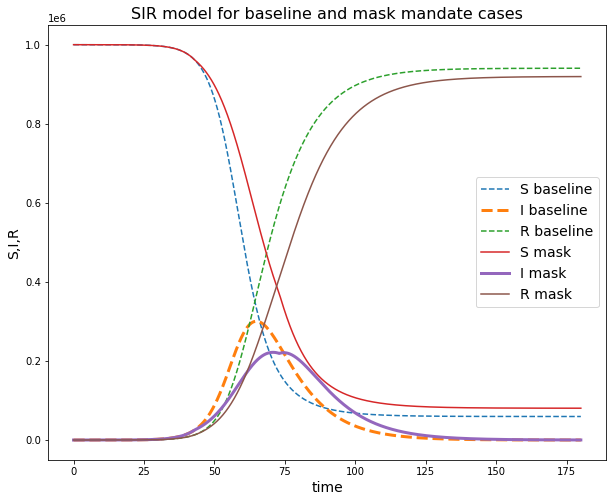

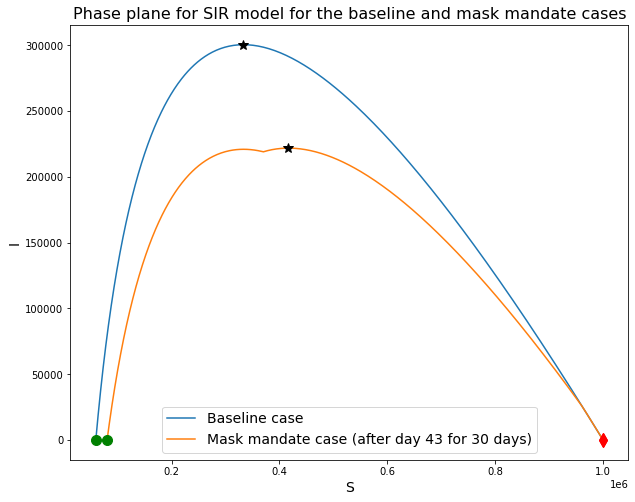

In the baseline case, the maximum value of I is 300463.6740973029  occuring at S = [332721.02710906] marked at the black star on the blue curve.
At the end of the simulation, the final value of S, I, and R are (rounded):
S(t=tf) = 59531
I(t=tf) = 51
R(t=tf) = 940418

In the mask mandate case, the maximum value of I is 221850.67776266113  occuring at S = [416101.56122502] marked at the black star on the orange curve.
At the end of the simulation, the final value of S, I, and R are (rounded):
S(t=tf) = 80500
I(t=tf) = 174
R(t=tf) = 919326


In [12]:
# --- Plotting the graphs in the baseline and mask mandate cases --- #

plt.figure(figsize=(10, 8))

# plot the time evolution of the S, I, R, and the same for the mask mandate case
plt.plot(t, S, label="S baseline",linestyle='--')
plt.plot(t, I, lw = 3, label="I baseline",linestyle='--')
plt.plot(t, R, label="R baseline",linestyle='--')
plt.plot(t, S_mask, label="S mask")
plt.plot(t, I_mask, lw = 3, label="I mask")
plt.plot(t, R_mask, label="R mask")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model for baseline and mask mandate cases", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the evolution in the S,I phase plane for the baseline and mask mandate cases
plt.figure(figsize=(10, 8))
plt.plot(S, I, label='Baseline case')
plt.plot(S_mask, I_mask, label='Mask mandate case (after day 43 for 30 days)')

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model for the baseline and mask mandate cases", fontsize=16)
plt.legend(fontsize=14)

# put some markers to show initial and final states and the max value of I
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.plot(S[np.where(I==np.amax(I))],np.amax(I), 'k*', markersize = 10)
plt.plot(S_mask[0], I_mask[0], 'rd', markersize = 10)
plt.plot(S_mask[-1], I_mask[-1], 'go', markersize = 10)
plt.plot(S_mask[np.where(I_mask==np.amax(I_mask))],np.amax(I_mask), 'k*', markersize = 10)
plt.show()

# --- Report the final values of S, I, R in the baseline and mask mandate cases  --- #

print('In the baseline case, the maximum value of I is',np.amax(I)," occuring at S =",S[np.where(I==np.amax(I))],'marked at the black star on the blue curve.' )
print("At the end of the simulation, the final value of S, I, and R are (rounded):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]))
print()
print('In the mask mandate case, the maximum value of I is',np.amax(I_mask)," occuring at S =",S_mask[np.where(I_mask==np.amax(I_mask))],'marked at the black star on the orange curve.' )
print("At the end of the simulation, the final value of S, I, and R are (rounded):")
print("S(t=tf) =", round(S_mask[-1]))
print("I(t=tf) =", round(I_mask[-1]))
print("R(t=tf) =", round(R_mask[-1]))

#### Description of graphs above:

As with the prior infection case, the curve has been 'flattened' and the phase plane shows that the graph of S against I is lower in the mask mandate case at any given value of S. However, the mask mandate has caused the value of R at large t to be only slightly lower than in the baseline case, and the phase plane shows that the curve in the mask mandate case is only slightly lower than the baseline case. This shows how the mask mandate case is not as effective as the 20% immunity case in reducing the spread of the disease.